# Lab 10 – Classification

DUE: March 20, 2024 (Wed)  
Pair Programming: Optional, but highly encouraged  
Name(s): Harrison Halesworth
Class: CSCI 349 - Intro to Data Mining  
Section: 01-11am 
Semester: Spring 2024  
Instructors: Brian King, Joshua Stough 

# Objectives
-   More visualization and EDA for classification problems
-   Building and evaluating models with sklearn

# Introduction
This is your introduction to building classification models using scikit-learn (sklearn), and equally important evaluating them for performance assessment. There are also more visual EDA exercises to strengthen your plotting skills.

You WILL be importing numerous *additional* packages beyond what we've given you as you work through the lab. You won't be told what to import. You should be able to figure that out using [insert your favorite AI assistant here] and good ol' fashioned Google. 

Generally, we recommend keeping all of your import statements neat and organized in the top cell of your notebook file. Though, if you want to keep this as a reference (which you should), it wouldn't hurt you to include it in the top cell AND also in the cell where you are answering the question.


In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# We used plotly. If you don't use plotly, then comment or remove these imports
import plotly
import plotly.graph_objects as go
import plotly.express as px
import plotly.figure_factory as ff

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_predict
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB

In [2]:
import sklearn
sklearn.__version__

'1.2.2'

**1)**	[P] Read about the [Iris dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set). This is perhaps the most commonly used dataset to teach students how to build classification models. It's a small dataset, and it's easy to understand. It's also a great dataset to learn how to visualize and explore your data. It's boring, but it's a great place to start.

Let's show you the list of datasets built into Seaborn:

In [3]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic',
 'anagrams',
 'anagrams',
 'anscombe',
 'anscombe',
 'attention',
 'attention',
 'brain_networks',
 'brain_networks',
 'car_crashes',
 'car_crashes',
 'diamonds',
 'diamonds',
 'dots',
 'dots',
 'dowjones',
 'dowjones',
 'exercise',
 'exercise',
 'flights',
 'flights',
 'fmri',
 'fmri',
 'geyser',
 'geyser',
 'glue',
 'glue',
 'healthexp',
 'healthexp',
 'iris',
 'iris',
 'mpg',
 'mpg',
 'penguins',
 'penguins',
 'planets',
 'planets',
 'seaice',
 'seaice',
 'taxis',
 'taxis',
 'tips',
 'tips',
 'titanic',
 'titanic',
 'anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'plan

You should see 'iris' in the list. Now, load iris into a dataframe called df_iris. Show the info() output to confirm that you have a dataframe with 150 observations and 5 variables.

In [4]:
# ANSWER:

df_iris = sns.load_dataset('iris')
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


**2)**	[P] Be thankful for a moment, because the data are clean. However, the `species` variable needs work. Convert the variable to a pandas `Categorical` variable. Then show the distribution of your variable (how many of each species?). Repeat the `info()` output to show that your target variable is now categorical, and not merely an object.

In [5]:
# ANSWER: 

df_iris["species"] = pd.Categorical(df_iris["species"])
print(df_iris["species"].value_counts())
df_iris.info()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   sepal_length  150 non-null    float64 
 1   sepal_width   150 non-null    float64 
 2   petal_length  150 non-null    float64 
 3   petal_width   150 non-null    float64 
 4   species       150 non-null    category
dtypes: category(1), float64(4)
memory usage: 5.1 KB


**3)**	[P] Now, perform essential summarizing tasks on your data. Show the output of describe() and show the first 10 observations.

In [6]:
# ANSWER: 

print(df_iris.describe())
df_iris.head(10)

       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


---
## More visual EDA and plotting

It's far more telling to generate good visualizations of your data. You will generate numerous plots of your data. Use the interface of your choosing. Any of matplotlib, seaborn, plotly, or a combination of all, are acceptable. (HINT - Sometimes for quick visualizations, the pandas interface to matplotlib is simple, effective and the way to go! For example, `df_iris.boxplot()`! )

> Do we need to normalize these data for visualizations? All four variables are measurements on the same scale. It's actually more telling to ensure they are on the original scale and not normalized in any way. Remember – a data scientist has a wealth of tools and tricks to accomplish a large number of tasks to get from raw data to models, predictions, and visualizations. Don't ever start blindly applying random steps! That will always lead you to dangerous territory in data science, possibly causing you to draw conclusions that will only get you in trouble.

**For these plots, minimally, be sure to title and label your plots!**



**4)**	[P] Always start with basic univariate plots. However, let's show the four variables as boxplots, side by side. Create a single boxplot showing each of the four independent variables on one plot. Ignore the target variable species for the time.

Text(0, 0.5, 'Values')

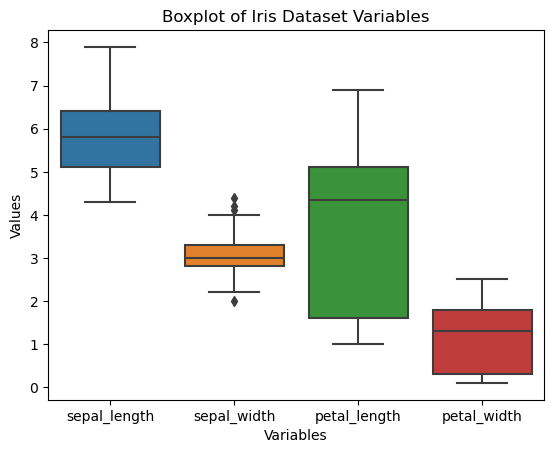

In [7]:
# ANSWER:

sns.boxplot(data=df_iris.drop(columns="species"))
plt.title("Boxplot of Iris Dataset Variables")
plt.xlabel("Variables")
plt.ylabel("Values")

With all plots requested, you may use your own color schemes and be creative.

## "Melting" your data into a long format

Seaborn is great for dealing with lots of variables. And even better, it usually knows how to interpret those variables… usually. But its interface is limited for interactive data visualization. If you're using **Plotly**, you can make the above graph using the lower level graph_objects interface, and use the add_trace method of the Figure object to add subsequent box plots for each variable. However, this approach, while powerful, requires several lines of code. Sometimes you want the quickness and ease of plotly.express to create many very simple graphs. To do this, **you need to transform your data into a melted frame using pd.melt()**. This cool function quickly transforms your data frame from a "wide" into "long" format, making it very easy to still use plotly.express. In fact, Plotly Express explicitly suggests that you transform your data into what they call **Tidy Data** using the pd.melt() function (See <https://plot.ly/python/px-arguments/> ) Or, you can just use the melt method of your DataFrame object. Both will accomplish the same thing. It's worth taking a moment read about this valuable pandas function. It can help you with many visualization methods in both Seaborn, Plotly and others.

For example, try this one out:
```
df_iris_melt = pd.melt(df_iris, id_vars="species")
display(df_iris_melt.head(5))
```
Notice how it changed the structure of your dataframe? Now, you can easily use that in with the simpler Plotly Express functions. For example, try this in another cell:

```
fig = px.box(df_iris_melt, x='variable',y='value',
             title="Fisher's Iris Data")
fig.update_yaxes(title="cm")
fig.show()
```

There is a learning curve with plotly, but entirely worth your time. It's a powerful tool for interactive data visualization. And, it's a great way to make your data visualizations interactive and web-ready.


**5)**	[M/P] Violin plots are becoming increasingly common in data science. First, explain what a violin plot is. Then, figure out how to generate a univariate violin plot of each independent variable. Compare and contrast your violin plot against the boxplot. (NOTE: Seaborn makes this very easy!)

Text(0, 0.5, 'Values')

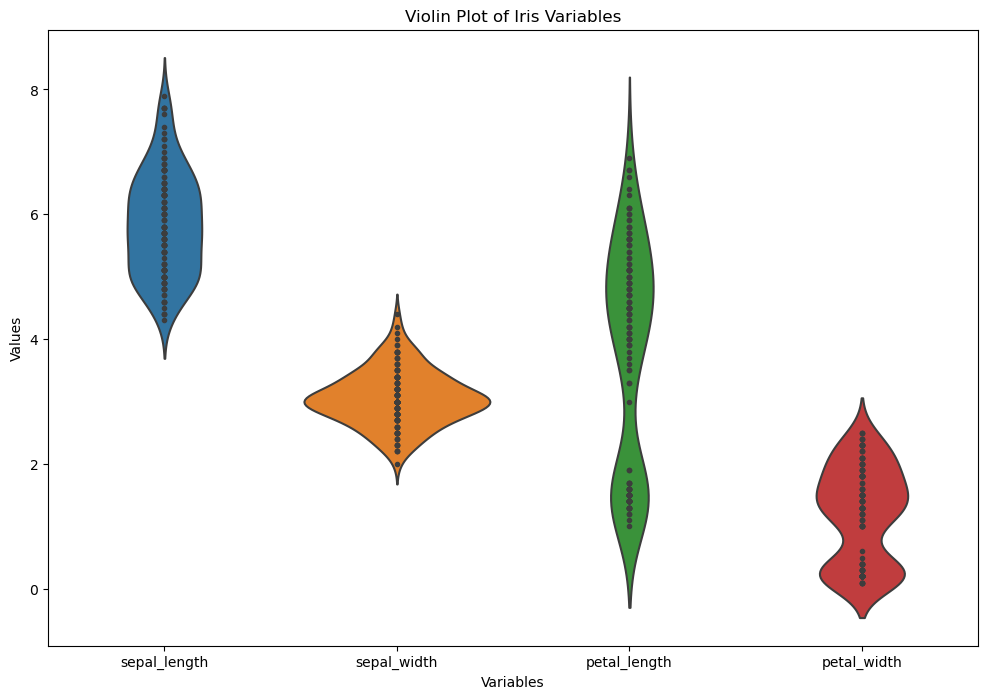

In [8]:
# ANSWER:

plt.figure(figsize=(12, 8))
sns.violinplot(data=df_iris.drop(columns="species"), inner="points")
plt.title("Violin Plot of Iris Variables")
plt.xlabel("Variables")
plt.ylabel("Values")

ANSWER: Violin plots are used to compare a boxplot and a kernel density plot created for a variable with another variable. It shows the datapoints in the middle sort of like a number line but also like a boxplot then puts the KDE on the outside or both sides depending on if you are doing it symmetrically or not.

**6)**	[P] Show a histogram and/or a density plot of each variable on a single plot. And be sure to provide some way to see the distribution of all four variables separately. You could use alpha blending on the histogram, or perhaps consider a "rugplot" overlaid on top. Both plots are valid but a violin plot in my opinion gives you more information at a glance about what your variable looks like than a boxplot, for instance you can see that sepal_width is very uniformly distributed.

C:\Users\hhale\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\hhale\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\hhale\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\hhale\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

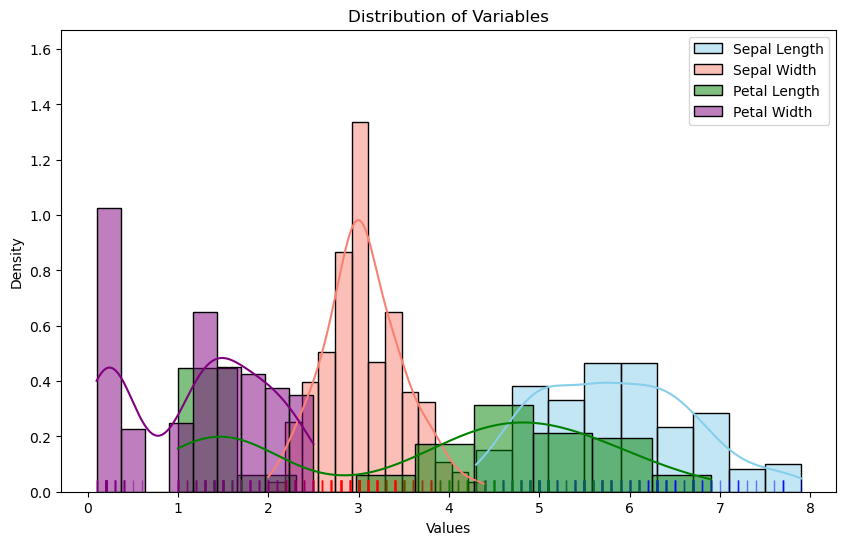

In [9]:
# ANSWER:

plt.figure(figsize=(10, 6))

sns.histplot(df_iris["sepal_length"], kde=True, color="skyblue", 
             stat="density", alpha=0.5, label="Sepal Length")
sns.rugplot(df_iris["sepal_length"], color="blue", alpha=0.5)

sns.histplot(df_iris["sepal_width"], kde=True, color="salmon", 
             stat="density", alpha=0.5, label="Sepal Width")
sns.rugplot(df_iris["sepal_width"], color="red", alpha=0.5)

sns.histplot(df_iris["petal_length"], kde=True, color='green', 
             stat='density', alpha=0.5, label="Petal Length")
sns.rugplot(df_iris["petal_length"], color="green", alpha=0.5)

sns.histplot(df_iris["petal_width"], kde=True, color="purple", 
             stat="density", alpha=0.5, label="Petal Width")
sns.rugplot(df_iris["petal_width"], color="purple", alpha=0.5)

plt.legend()
plt.xlabel("Values")
plt.ylabel("Density")
plt.title("Distribution of Variables")
plt.show()

**7)**	[M] Summarize your findings from these plots. Is one most ideal for understanding your distribution? Characterize the distribution of your four variables. Remember, this is a univariate exploration, so you don't care about the class variable yet. 

ANSWER: Sepal width and Sepal length both have relatively normal distributions with a single peak, while petal length and petal width both had more than one peak, but petal length's distribution was thrown off by some outliers.

---
Now, you will perform some basic multivariate analyses. If you're NOT using plotly, be sure to explore how to make plots large enough to examine using the figsize parameter. A reasonable size should be (10,8).

**8)**	[P] Use the pandas interface to generate a quick boxplot (df_iris.boxplot()!)  However, look up how to created a faceted boxplot with each variable listed in a separate plot, automatically showing the distributions of your variables by "species". 



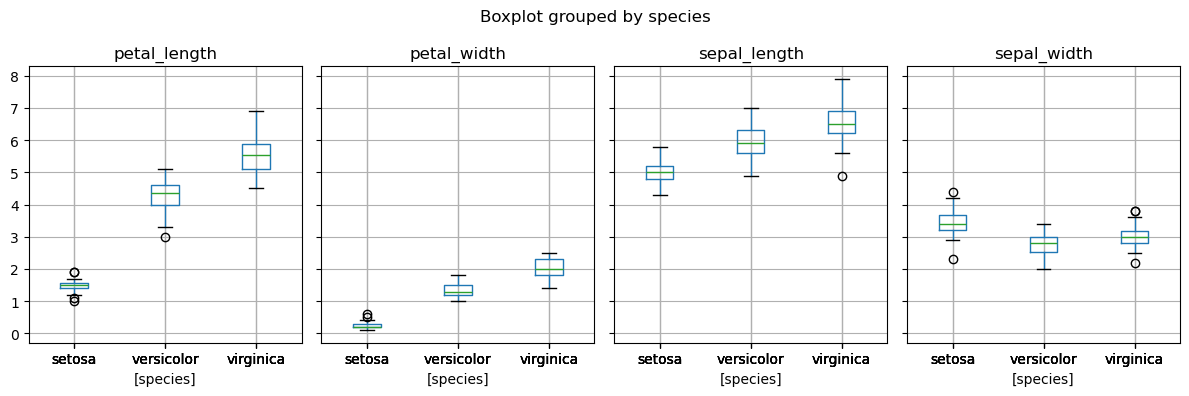

In [10]:
# ANSWER

df_iris.boxplot(by="species", layout=(1, 4), figsize=(12, 4))
plt.tight_layout()
plt.show()

**9)**	[P] Use either seaborn or plotly to generate a boxplot over each variable, but now showing the three different species as distinct boxplots. For example:

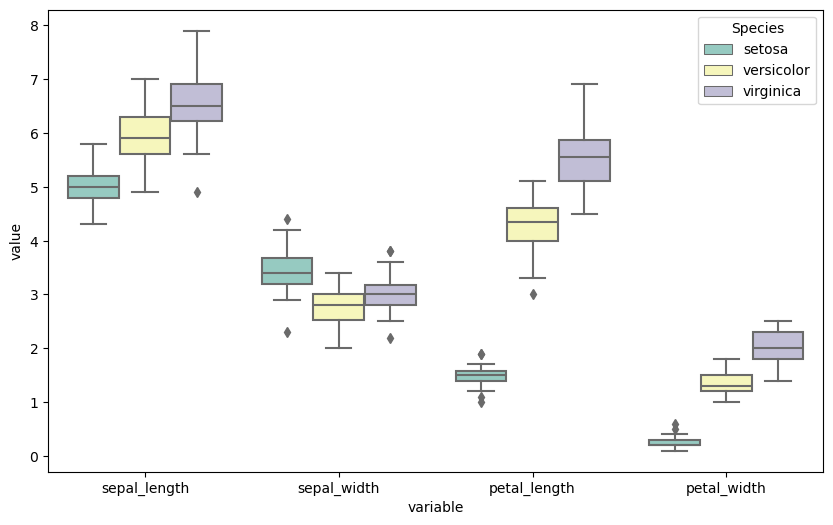

In [11]:
# ANSWER: 

df_iris_long = df_iris.melt(id_vars="species", 
                            var_name="variable", value_name="value")

plt.figure(figsize=(10, 6))
sns.boxplot(data=df_iris_long, x="variable", y="value", 
            hue="species", palette="Set3")
plt.legend(title="Species")
plt.show()

**10)**	[P] Generate a violin plot over all variables much like the previous plot, but again, be sure to indicate the species as a distinct color.

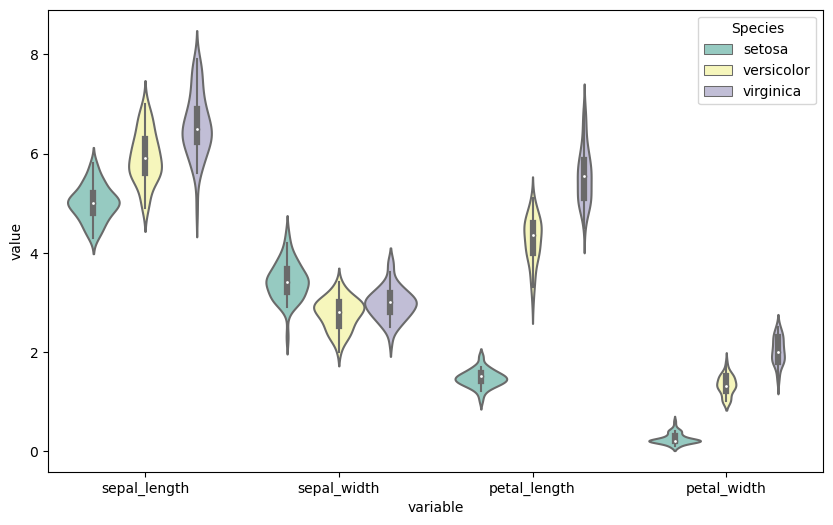

In [12]:
# ANSWER: 

plt.figure(figsize=(10, 6))
sns.violinplot(data=df_iris_long, x="variable", 
               y="value", hue="species", palette="Set3")
plt.legend(title="Species")
plt.show()

**11)**	 [P] Read about the `scatter_matrix()` function in pandas. Use it to generate a scatterplot matrix, and use species for the color.

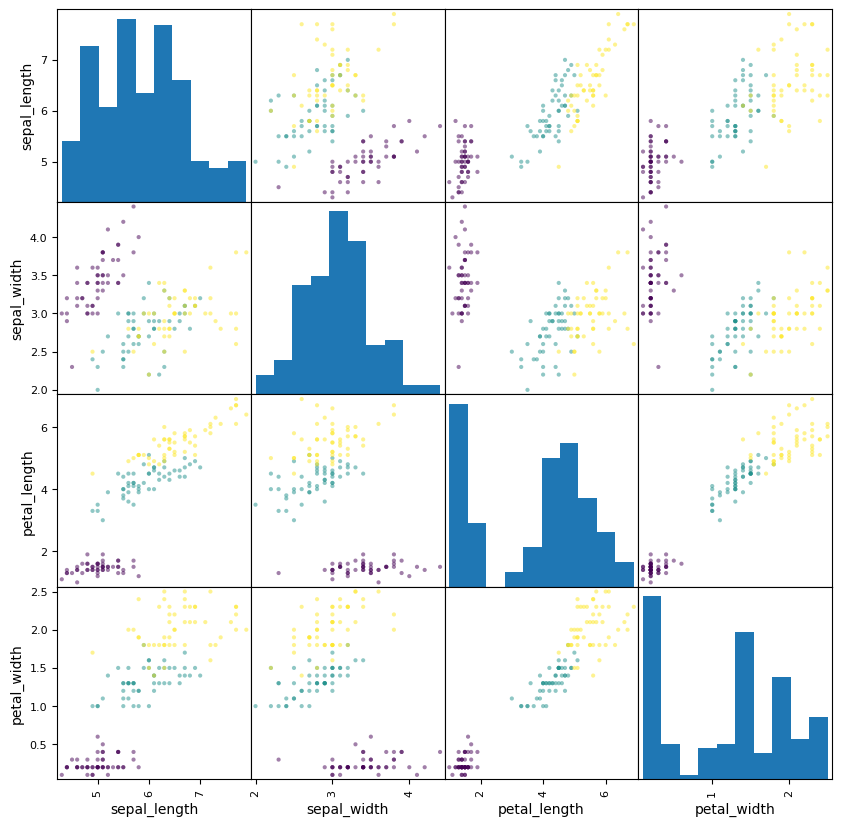

In [13]:
# ANSWER: 

pd.plotting.scatter_matrix(df_iris, 
                           c=df_iris["species"].astype("category").cat.codes, 
                           figsize=(10, 10))
plt.show()

**12)**	[P] Read about the seaborn `pairplot()` function, then use it to generate one of the most useful scatterplots matrices you'll see with this data. It won't be too different than the scatter_matrix, just easier to create. Take a moment to study the plot, and really try to understand just how much information this plot is conveying. Be sure to figure out how to distinguish the species by color.

C:\Users\hhale\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\hhale\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(
C:\Users\hhale\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\hhale\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and 

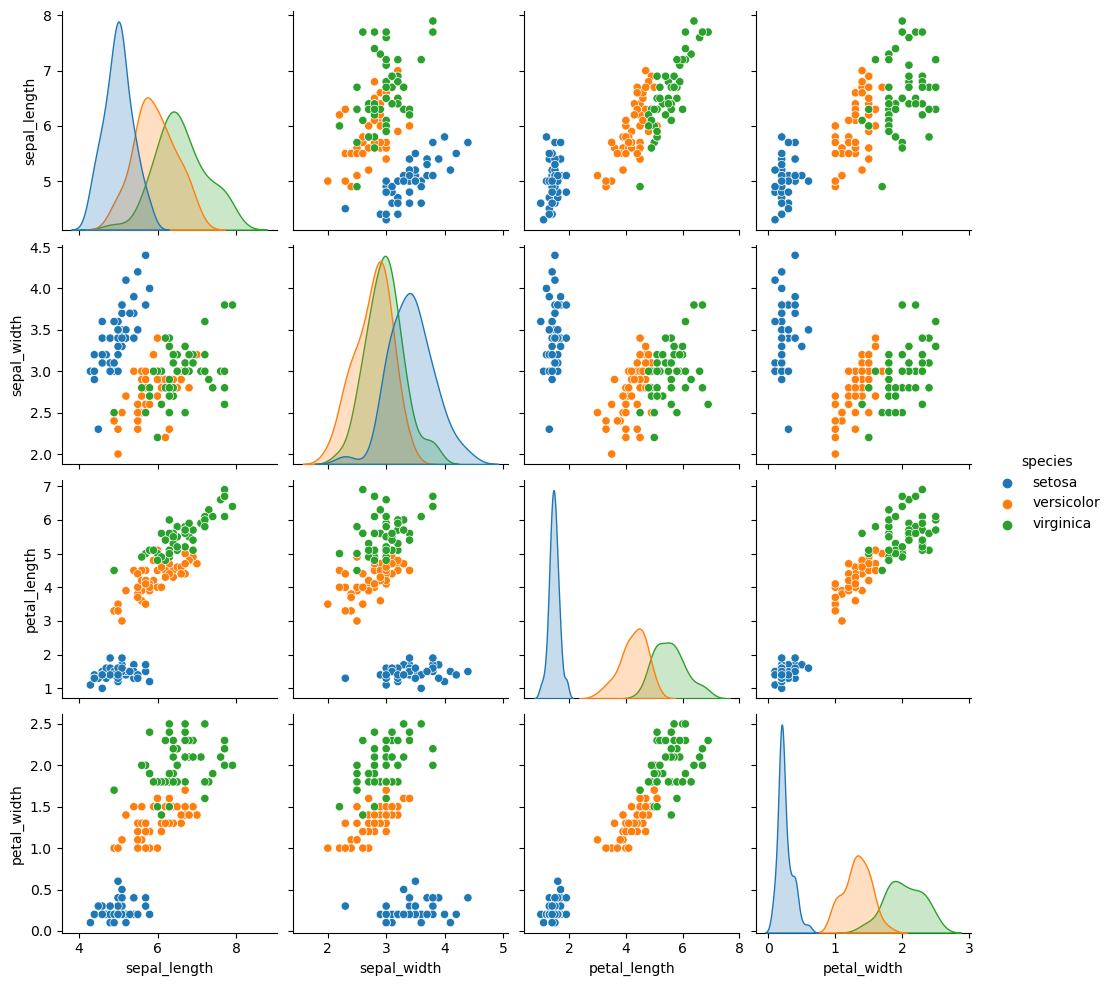

In [14]:
# ANSWER:

sns.pairplot(df_iris, hue="species")

**13)**	 [M] From your observations, which species do you expect to have the best classifier performance? Why? 

**setosa** should be the clear winner. It is easily distinguished from the other variables.

---
# Preparing for scikit-learn

OK. Let's get started with our first adventure into machine learning using scikit-learn. So far, you've learned a few different methods for modeling data. The majority of this lab will be designed to get you going with creating models, but there will be more emphasis on evaluation (performance on your training data) and validation (performance on your test data) of your models.  Follow along, and as usual, you are encouraged to take extra notes in your markdown file as these labs will make great references for you. Make the most of this lab! There is a lot here, and it represents the typical workflow of those who actually work with these types of data modeling problems using machine learning in practice.  The next lab will give you more opportunities to explore sklearn with more challenging data. However, you need to learn the API with the basics first.

> We will start simple, but will progressively, and quickly, release you to use your own resrouces to guide your own learning to find the answers.

Before you begin, read through the scikit tutorial's first section that introduces the user to machine learning with scikit-learn. It's mostly review, but will have some information and examples that could be quite helpful. Keep the tutorial and user guide handy for the remainder of the semester. You will surely need it!

**Do NOT use the iris data built into scikit-learn! Just keep working with the data you have already loaded in above.**


---
## Preparing our data for modeling

When you are done with preprocessing, you will have a data frame that contains all of your data ready to model. Even before you split your data into training and test data, most modeling methods will require you to separate the independent (predictor) variables and the dependent (target) variable(s). The convention generally followed is to use the name **`X`** to represent the data frame for your independent variables, and the target variable is denoted **`y`**. Both should be data frames, though if `y` is a single variable (most common), then it's OK to represent it as a `pd.Series` or even a `np.array` object.


**14)**	[P] Split your data frame into X and y, where X represents only your four predictor variables, and y represents only the target class, species. Output the names of the columns and the shape of both just to confirm that they both have the same number of observations, and that the number of variables in each are correct. You should have (150, 4), and (150, 1) respectively.

In [15]:
# ANSWER:

X = df_iris.iloc[:,0:4]
y = df_iris["species"]
print(X.shape)
print(y.shape)

(150, 4)
(150,)


---
## Building our classifier

We're going to dive right in and build a classifier using default hyperparameters, using ALL of our data for training data. Since we started with the decision tree model, let's begin there. The model we want to begin with is the first model we learned about in class – the DecisionTreeClassifier. You can read about it here: <https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html>   
  
Generally, the sklearn documentation uses a standard convention naming all classifier objects as clf. All classifiers have a common interface: you use fit() to train a model with training data, and predict() to generate predictions on any data it is given. A common interface like this makes is incredibly easy to try out different models on your data.

**NOTE: You will need to be sure you import the proper libraries from sklearn! You will not be told which packages to import here.**

NOTE: Remember the standard machine learning pipeline:  
  
1) Clean your data  
2) Build your model  
3) Evaluation – Evaluate model performance on training data (same data used to build the model. If your performance on training data is bad, there is no point in continuing to validation.)  
4) Validation – Validate the model by assessing performance on test data (i.e. different data than training data  
  
Whenever I work with a new classifier, I always try to ensure the classifier can be trained with ALL of my data, and then predict back that same data. Don't bother jumping into validation of your model with cross-validation until you know the classifier can at least do well predicting the data that you trained it with! If it can't even do that, then something has gone horribly wrong.

Let's build a classifier with all of the data and evaluate its performance. For the time, let's ignore normalizing the attributes, and leave our data as is. As we discussed in the beginning, all four variables are mostly falling within a similar range, representing the same unit, and thus, at least for these data, normalizing is not as critical yet, particularly since we are going to start working with decision trees.



**15)**	[P] Create an instance of a decision tree classifier using `DecisionTreeCassifier()` with default parameters.  Name the classifier `clf`. Train the classifier with the entire dataset (i.e. all of X and y.) Show the classifier after training by simply include `print(clf)` so you can see the default parameters used to build the classifier

In [16]:
# ANSWER:

clf = DecisionTreeClassifier()
clf.fit(X, y)
print(clf)

DecisionTreeClassifier()


**16)**	P] Remember that one of the most popular reasons for using decision trees is because the model is easily visualized for model interpretation purposes. Use the plot_tree method to plot the tree. Explore the arguments to be sure that nodes are shaded by target class. Feature and class names should be shown. You should notice that the class you expected to perform well due to a clear decision boundary noted in your EDA above is indeed perfectly classified with only one node off the root node.


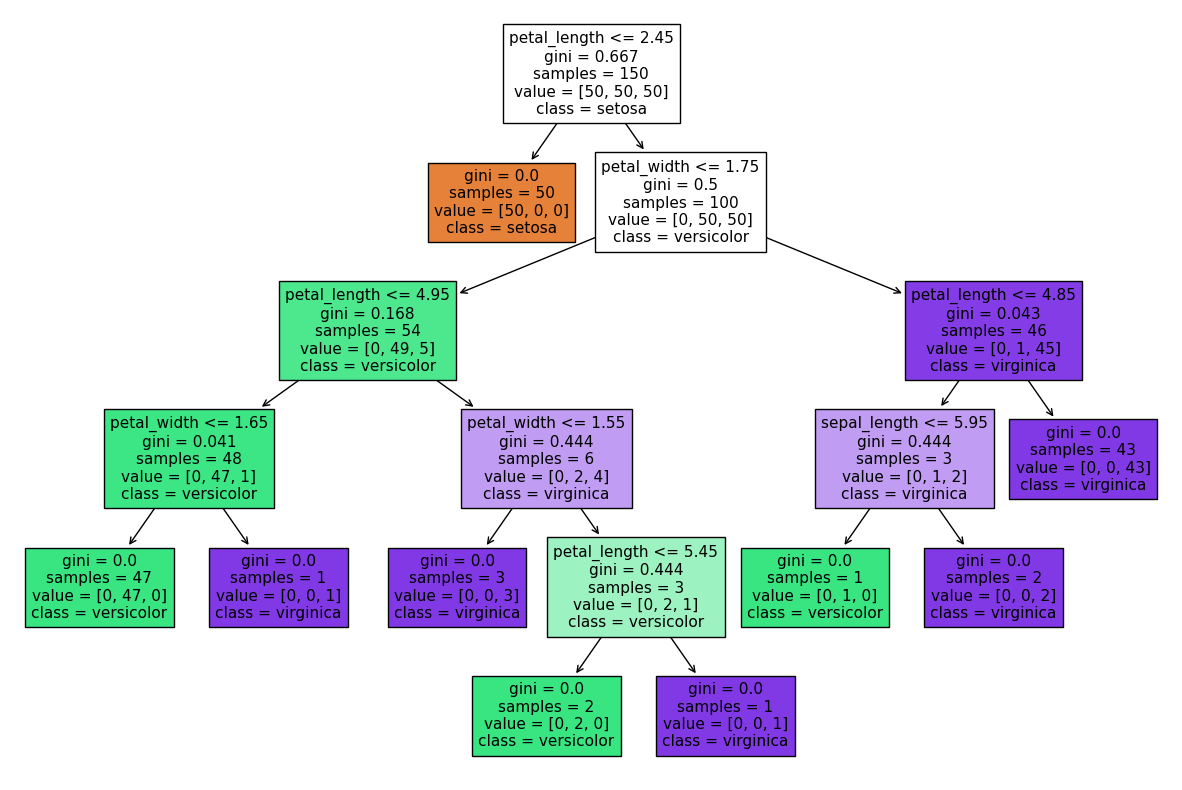

In [17]:
# ANSWER:

plt.figure(figsize=(15, 10))
plot_tree(clf, filled=True, feature_names=X.columns,
          class_names=clf.classes_)
plt.show()

**17)**	[P] - Use this model to predict back your training data to evaluate your model. Name your predictions `y_pred`. Report the score using the score method on the classifier. You should see 100% accuracy. Why? 

In [18]:
# ANSWER:

y_pred = clf.predict(X)
accuracy = clf.score(X, y)
print("Prediction accuracy : " + str(accuracy))

Prediction accuracy : 1.0


**18)**	[M] You should see 100% accuracy. Why? 

ANSWER: There is 100% accuracy because we are predicting the training data based with a model that is fit by the training data, so we of course should see 100% accuracy.

**19)**	[P] Let's simplify our tree. Create a new tree, but adjust the pruning / complexity parameters. How? We'll keep this simple. Ensure that every leaf in the tree contains at least 5 samples. Show the tree that you induced, and again store your predictions as y_pred. Then, reveal the accuracy.


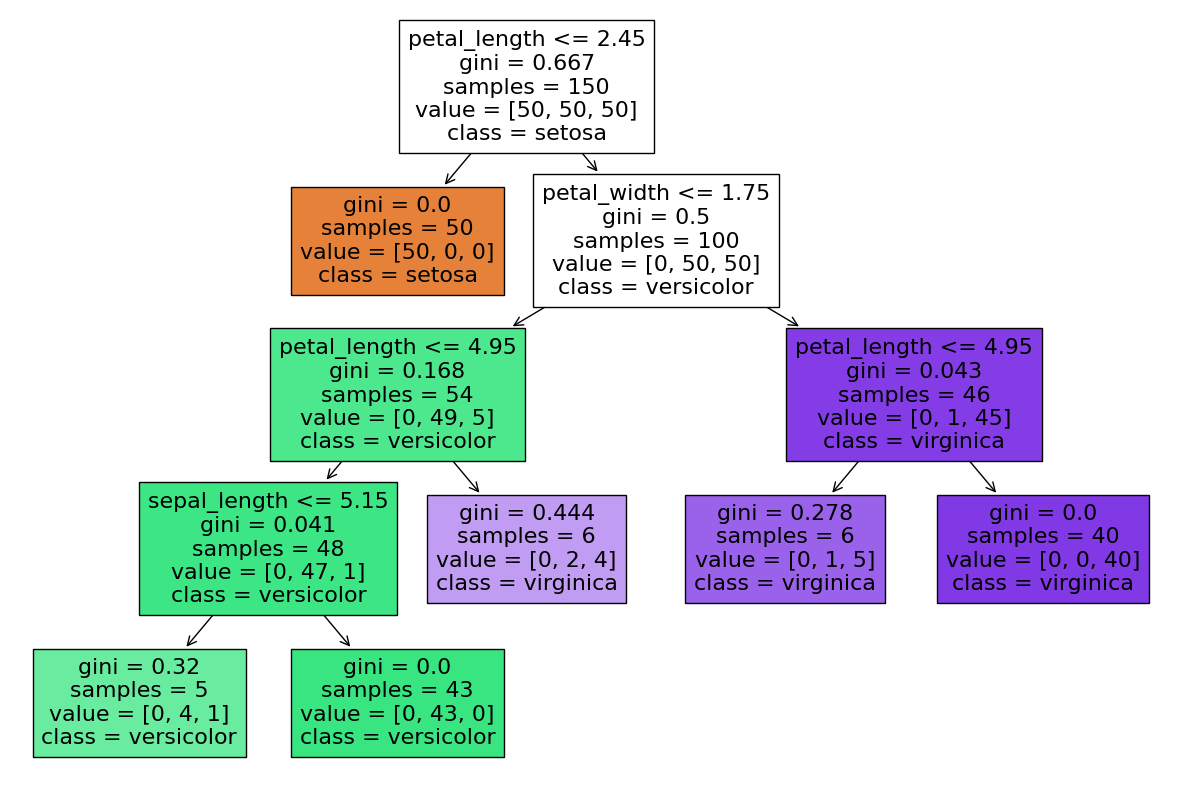

Prediction accuracy after pruning : 0.9733333333333334


In [19]:
# ANSWER:

clf_pruned = DecisionTreeClassifier(min_samples_leaf=5)
clf_pruned.fit(X, y)

plt.figure(figsize=(15, 10))
plot_tree(clf_pruned, 
          filled=True, 
          feature_names=X.columns, 
          class_names=clf_pruned.classes_)
plt.show()

y_pred_pruned = clf_pruned.predict(X)
accuracy_pruned = clf_pruned.score(X, y)
print("Prediction accuracy after pruning : " + str(accuracy_pruned))

**20)**	[M/P] OK – clearly we have lower accuracy. Dive deeper. Accuracy is usually not a good measure of classifier performance. Look up the function `classification_report`. This outputs a lot of performance information! What do the micro, macro, and weighted average readings mean? Generate a full report. Which class had the lowest precision? Which had the lowest recall?



In [20]:
# ANSWER:

report = classification_report(y, y_pred_pruned, 
                               target_names=clf.classes_)
print(report)

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        50
  versicolor       0.98      0.94      0.96        50
   virginica       0.94      0.98      0.96        50

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150



The virginica species had the lowest precision, and the versicolor species had the lowest recall.

Micro Average: treats each instance of each class with equal weight, is useful when there's class imbalance. Only applicable with multiple target variables.

Macro Average: Calculated by averaging precision, recall, and f1-score for each class without considering class imbalance.

Weighted Average: It is similar to macro average, but takes into account the number of instances per class, i.e. it is weighted by the number of instances of each class.

> (You are strongly encouraged (not required) to delve into understanding what the micro, macro, and weighted average readings mean. Take notes in this section if you are inclined to do so. This function will do a LOT for you!)

> Which class had the lowest precision? Which had the lowest recall?


**21)**	[P] Output a confusion matrix using the `confusion_matrix` method in `sklearn.metrics`. Your result should look like a square matrix, where rows are the true labels, and the columns are the predicted labels, and the diagonal represents the cases where the true label and predicted label match.

In [21]:
# ANSWER:

conf_matrix = confusion_matrix(y, y_pred)
conf_matrix_pruned = confusion_matrix(y, y_pred_pruned)
print("Here is the confusion matrix for") 
print("the prediction based on the original classifier : \n" + str(conf_matrix) + "\n")
print("Here is the confusion matrix for")
print("the prediction based on the pruned classifier : \n" + str(conf_matrix_pruned))

Here is the confusion matrix for the prediction based on the original classifier : 
[[50  0  0]
 [ 0 50  0]
 [ 0  0 50]]

Here is the confusion matrix for the prediction based on the pruned classifier : 
[[50  0  0]
 [ 0 47  3]
 [ 0  1 49]]


**22)**	[P] Even better! Look up how to use `ConfusionMatrixDisplay` from `sklearn.metrics` to output an excellent visual summary of the classifier performance.

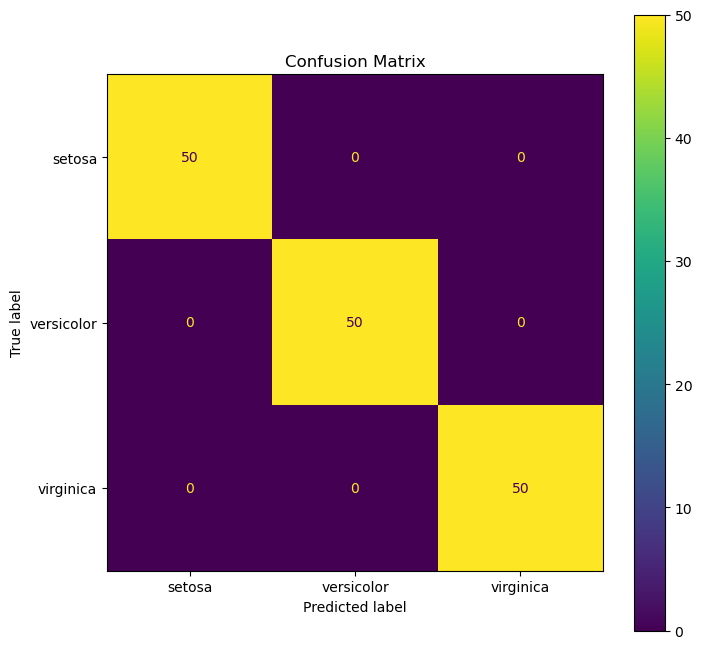

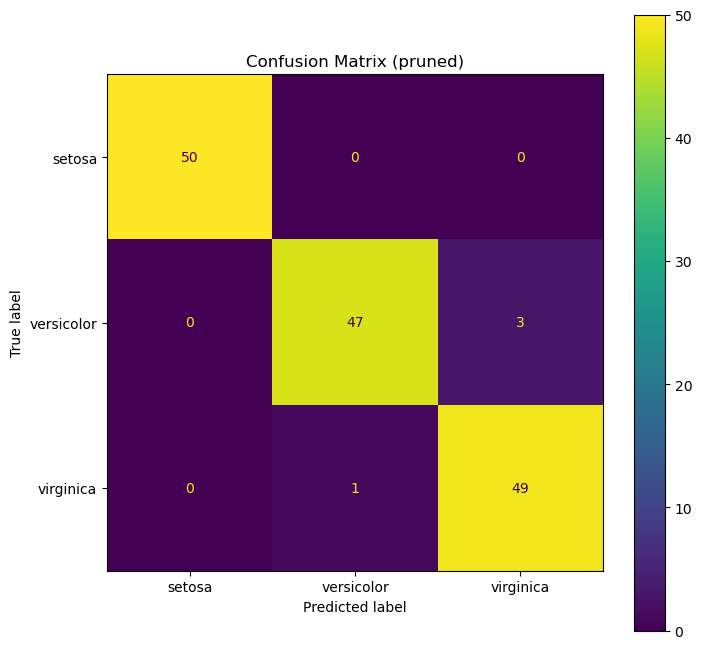

In [22]:
# ANSWER:

cm_display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,
                                    display_labels=clf.classes_)

fig, ax = plt.subplots(figsize=(8, 8))
cm_display.plot(ax=ax)
plt.title("Confusion Matrix")
plt.show()

# Create a ConfusionMatrixDisplay object with the confusion matrix
cm_display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_pruned,
                                    display_labels=clf.classes_)

# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(8, 8))
cm_display.plot(ax=ax)
plt.title('Confusion Matrix (pruned)')
plt.show()

**23)**	[M] Interpret your confusion matrix and classification report. Which class is performing the best? Which is performing the worst? How many total incorrect predictions?


ANSWER: Setosa is performing the best, Versicolor is performing the worst, and there were 4 total incorrect predictions.

---
# Evaluation vs. Validation

Up to now you've only really evaluated your model, where you build a model, and use it to predict back your training data. Once you have good results with training data, it's time to partition our data into training and testing datasets. Then, using the test data, we can validate our model to determine that it indeed is not overfitting our model.

**Cross validation** is the most common technique used to validate a machine learned model. There are many different approaches to validation (which has been, or will soon be covered in lecture!) We're going to start pretty simple. Fortunately, scikit-learn has plenty of useful functions to assist with the evaluation and validation of your model.



**24)**	You need to create a train / test split of your data to properly validate your model. Read about `sklearn.model_selection` function called `train_test_split`. Then, use it to split your data into an 70% / 30% split of training and testing data, respectively. You should end up with four data frames, denoted X_train, X_test, Y_train, Y_test. Use an initial seed of 0. Be sure to shuffle the data (verify that this is a default setting.) Show the dimensions of these (i.e. how many entries in each?)





In [23]:
# ANSWER:

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.3, 
                                                    random_state=0)
print("Dimensions of X_train:", X_train.shape)
print("Dimensions of X_test:", X_test.shape)
print("Dimensions of y_train:", y_train.shape)
print("Dimensions of y_test:", y_test.shape)

Dimensions of X_train: (105, 4)
Dimensions of X_test: (45, 4)
Dimensions of y_train: (105,)
Dimensions of y_test: (45,)


---
NOTE: Technically, `train_test_split`, like most scikit-learn modules, ignore pandas, and return numpy arrays. If you properly set up your data, and maintain your types throughout, it will do a reasonable job maintaining those types. I generally find it's important to keep my data, and splits, my predicted values, etc. all as pandas DataFrames, but this is a matter of preference. If you are missing your column and index variables, it's most likely because you lost type information at some point in your pipeline. Just cast your data back to a pandas DataFrame and restore those important variables.

**25)**	Create a new instance of `DecisionTreeClassifier` with an initial random seed value of 100, and a minimum number of samples in a leaf set to 5. Store the classifier as `clf` again. Train your classifier with your training data.

In [24]:
# ANSWER:

clf = DecisionTreeClassifier(random_state=100, 
                             min_samples_leaf=5)
clf.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_leaf=5, random_state=100)

**26)**	Use this model to predict the labels on your training and test data. Call your predictions y_pred_train. and y_pred_test. Show the accuracy on both your training data and test data.

In [25]:
# ANSWER: 

y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)

accuracy_train = clf.score(X_train, y_train)
accuracy_test = clf.score(X_test, y_test)

print("Accuracy on training data:", accuracy_train)
print("Accuracy on test data:", accuracy_test)

Accuracy on training data: 0.9619047619047619
Accuracy on test data: 0.9111111111111111


**27)**	[P/M] Use the classification report and confusion matrix techniques discussed above to assess the performance of your classifier on both the training and the test data. Summarize your findings.



In [26]:
# ANSWER:

train_report = classification_report(y_train,
                                     y_pred_train,
                                     target_names=clf.classes_)
conf_matrix_train = confusion_matrix(y_train,
                                     y_pred_train)

test_report = classification_report(y_test,
                                    y_pred_test,
                                    target_names=clf.classes_)
conf_matrix_test = confusion_matrix(y_test,
                                    y_pred_test)

print("Report for training data : " + "\n")
print(str(train_report) + "\n")
print("Confusion matrix for training data : " + "\n")
print(str(conf_matrix_train) + "\n")
print("Report for test data : " + "\n")
print(str(test_report) + "\n")
print("Confusion matrix for test data : " + "\n")
print(str(conf_matrix_test) + "\n")

Report for training data : 
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        34
  versicolor       0.91      0.97      0.94        32
   virginica       0.97      0.92      0.95        39

    accuracy                           0.96       105
   macro avg       0.96      0.96      0.96       105
weighted avg       0.96      0.96      0.96       105


Confusion matrix for training data : 
[[34  0  0]
 [ 0 31  1]
 [ 0  3 36]]

Report for test data : 
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        16
  versicolor       0.85      0.94      0.89        18
   virginica       0.89      0.73      0.80        11

    accuracy                           0.91        45
   macro avg       0.91      0.89      0.90        45
weighted avg       0.91      0.91      0.91        45


Confusion matrix for test data : 
[[16  0  0]
 [ 0 17  1]
 [ 0  3  8]]



It seems that the classifier did a good job as the precision and other averages for both the training and test data performed pretty well. Naturally the performance on the test data was not quite as good as the performance on the training data but that is to be expected.

**28)**	 [P] Quite often, when we have misclassifications, it's important to take the time to dig into your test data to determine which observations are being misclassified. Use data selection techniques to output the data that are being misclassified in the test data only.



In [27]:
# ANSWER:

test_results = pd.DataFrame(
    {'True Label': y_test,
     'Predicted Label': y_pred_test}
)
test_results['Correct Prediction'] = 
    test_results['True Label'] == test_results['Predicted Label']

misclassified_data = 
    test_results[test_results['Correct Prediction'] == False]

print("Here are the misclassified data : " + "\n")
print(str(misclassified_data))

Here are the misclassified data : 
     True Label Predicted Label  Correct Prediction
121   virginica      versicolor               False
126   virginica      versicolor               False
127   virginica      versicolor               False
83   versicolor       virginica               False


**29)** [P] It's even more interesting when you can visualize where in your feature space your classifier might be missing something. Create a scatterplot matrix, but this time, highlight the instance(s) that are being misclassified. 

> (HOW? Can you create a new variable that represents the accuracy of the prediction? Use it as another dimension? A new color? A larger point size? Any scatter plot you can come up with that will highlight the location of the misclassified data receives full credit. This is an important step in understanding how to deal with problematic data.)

If you do this in a useful way, you'll get a nice visual indicator that, as expected, the misclassified instances were instances falling on the divide between versicolor and virginicia 


In [28]:
# ANSWER: 

---
## K-Fold Cross Validation

**30)**	[M/P] Read about the `KFold` class. State what a `KFold` cross validation object will do for you. Then, create an instance of KFold with 10 splits, an initial seed of 100, and be sure to shuffle your data. Call your model kfold.

In [29]:
# ANSWER:

kfold = KFold(n_splits=10, random_state=100, shuffle=True)

The KFold cross validation object can be used to split a dataset into k folds of equal size and these folds are then used when determining training vs. test data.

**31)**	[P] Read about the `split()` method for `KFold`. It will help you iterate through each fold of your data. Take the time to understand how it works! If you set this up right, you will have a loop that will let you easily select train and test data for each fold. Once you do that, then you are merely repeated what you did already for the 70/30 split data above! For each fold, you fit a new model on the training data for that fold, then validate the model on the test data for the same fold. After 10 folds, you will have validated your model using your entire dataset as validation data!

Inside your loop, you should NOT print out your classification results. (However, sometimes it's useful to use Python timing functions to collect timing on different model building tasks, and that would be done inside the loop, placing a time stamp before and after the call to fit().) Only store the results of predicting on the test fold. I would accumulate my true class label and my predictions in a separate data frame, called df_results.

If you do this right, you will have a new data frame with a variable, such as "dt_def", or "dt_default", representing the prediction from the default decision tree classifier.


In [30]:
# ANSWER:

df_results = pd.DataFrame()

for fold, (train_index, test_index) in enumerate(kfold.split(X)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    clf = DecisionTreeClassifier()
    clf.fit(X_train, y_train)
    
    y_pred = clf.predict(X_test)
    
    df_fold_results = pd.DataFrame({
        "True Label": y_test,
        "Predicted Label": y_pred
    })
    df_fold_results["Correct Prediction"] = 
        df_fold_results["True Label"] == df_fold_results["Predicted Label"]
    
    df_fold_results["Fold"] = fold + 1
    
    df_results = pd.concat([df_results, df_fold_results], 
                           ignore_index=True)

df_results.rename(columns={"Predicted Label": "dt_default"}, 
                  inplace=True)

In [31]:
df_results

,True Label,dt_default,Correct Prediction,Fold
0,setosa,setosa,True,1
1,setosa,setosa,True,1
2,setosa,setosa,True,1
3,setosa,setosa,True,1
4,setosa,setosa,True,1
...,...,...,...,...
145,versicolor,versicolor,True,10
146,virginica,virginica,True,10
147,virginica,virginica,True,10
148,virginica,virginica,True,10


**32)**	[P] Print out a classification report from your 10 fold cross validation. Also print out your confusion matrix with a plot from `ConfusionMatrixDisplay` as you have done above:

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        50
  versicolor       0.94      0.92      0.93        50
   virginica       0.92      0.94      0.93        50

    accuracy                           0.95       150
   macro avg       0.95      0.95      0.95       150
weighted avg       0.95      0.95      0.95       150



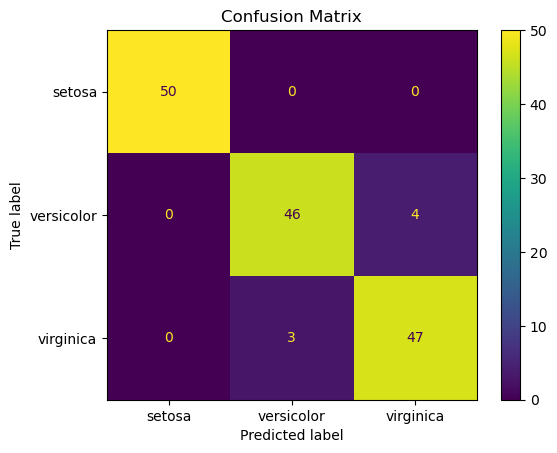

In [32]:
# ANSWER:

y_true = df_results['True Label']
y_pred = df_results['dt_default']
print("Classification Report:\n", 
      classification_report(y_true, y_pred))

conf_matrix = confusion_matrix(y_true,
                               y_pred)
disp = ConfusionMatrixDisplay(conf_matrix,
                              display_labels=clf.classes_)

disp.plot()
plt.title("Confusion Matrix")
plt.show()

**33)**	 [P] Select and generate a report all of your test instances that were misclassified from the 10 fold cross validation. Also, generate a scatterplot that highlights the location of the instances that were misclassified.

In [33]:
# ANSWER:

misclassified_df = 
    df_results[df_results['Correct Prediction'] == False]
print("Misclassified Instances Report:\n", 
      misclassified_df)

Misclassified Instances Report:
      True Label  dt_default  Correct Prediction  Fold
22   versicolor   virginica               False     2
43    virginica  versicolor               False     3
79   versicolor   virginica               False     6
81   versicolor   virginica               False     6
84   versicolor   virginica               False     6
100   virginica  versicolor               False     7
103   virginica  versicolor               False     7


ValueError: Could not interpret value `sepal_length` for parameter `x`

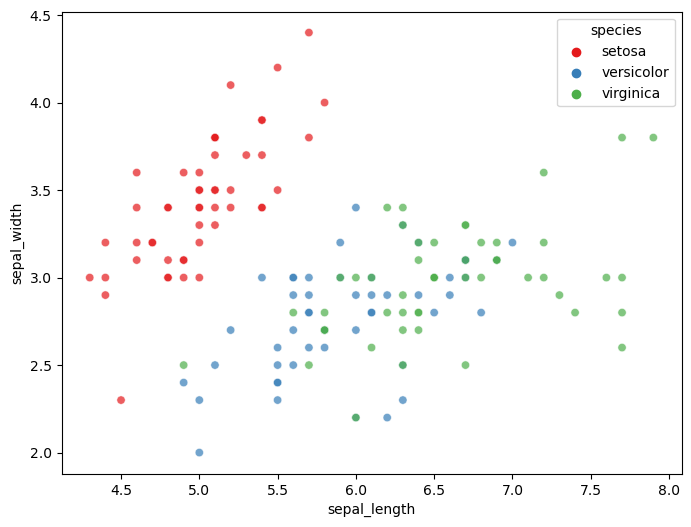

In [34]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=X, 
                x="sepal_length", 
                y="sepal_width", 
                hue=y, 
                palette="Set1", 
                alpha=0.7)

sns.scatterplot(data=misclassified_df, 
                x="sepal_length", 
                y="sepal_width", 
                hue="True Label", 
                palette="Set1", 
                marker="X", 
                s=100)

plt.title("Misclassified Instances Scatterplot")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend(title="Species")
plt.show()

**34)** 	[P] As you would expect, the scikit-learn framework has some powerful methods that can run an entire cross validation and report whatever metrics you want. Read about the cross_validate method, then use it to run a 10-fold cross validation on a default decision tree, reporting back 'accuracy' and 'f1_macro' measurements on both the training and testing data. Report your results as a single data frame. Your results should look as follows.

In [ ]:
# ANSWER:

scoring = ["accuracy", "f1_macro"]
cv_results = cross_validate(clf, 
                            X, 
                            y, 
                            cv=10, 
                            scoring=scoring)

results_df = pd.DataFrame(cv_results)
print(results_df)

**35)** [M] On the above, what are the variables fit_time and score_time?



ANSWER: fit_time is the time it took to fit the estimator on the training data for each fold during the cross-validation process, and score_time is the time it took to score/evaluate the estimator on the testing data for each fold during the cross-validation.

**36)**	[P] OK, one last function for validation purposes. Read about the function cross_val_predict. This is perhaps among the most powerful of the model selection functions provided by sklearn, as it pretty much does everything we need in one function call. And, the predictions are returned! You can then use these predictions to run a classification_report and report confusion matrices.  Use the cross_val_predict function to run a 10-fold cross validation with a default decision tree, and print the classification_report on your results.



In [36]:
# ANSWER:

y_pred = cross_val_predict(clf, 
                           X, 
                           y, 
                           cv=10)

print(classification_report(y, 
                            y_pred, 
                            target_names=df_iris['species'].unique()))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        50
  versicolor       0.92      0.94      0.93        50
   virginica       0.94      0.92      0.93        50

    accuracy                           0.95       150
   macro avg       0.95      0.95      0.95       150
weighted avg       0.95      0.95      0.95       150



**37)** [MP] For your last task, you will perform model comparison tasks. Use the cross_val_predict method to compare the predictive performance on the following models:
    a.  A default decision tree
    b.  A decision tree with "entropy" for measuring impurity
    c.  A `KNeighborsClassifier` with a two different values of k (.)
    d.  `MultinomialNB` classifier (sklearn's Naïve Bayes implementation)

Compare and contrast the performance results between the different models. Which one would you choose?



In [47]:
# ANSWER - default decision tree

y_pred_dt = cross_val_predict(DecisionTreeClassifier(), 
                              X, 
                              y, 
                              cv=10)

print("Performance for default decision tree : \n")
print(classification_report(y, 
                            y_pred_dt, 
                            target_names=df_iris["species"].unique()))

Performance for default decision tree : 

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        50
  versicolor       0.92      0.94      0.93        50
   virginica       0.94      0.92      0.93        50

    accuracy                           0.95       150
   macro avg       0.95      0.95      0.95       150
weighted avg       0.95      0.95      0.95       150



In [48]:
# ANSWER - A decision tree with "entropy" for measuring impurity

y_pred_entropy = 
    cross_val_predict(DecisionTreeClassifier(criterion="entropy"), X, y, cv=10)

print("Performance for decision tree with entropy : \n")
print(classification_report(y, 
                            y_pred_entropy, 
                            target_names=df_iris["species"].unique()))

Performance for decision tree with entropy : 

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        50
  versicolor       0.94      0.94      0.94        50
   virginica       0.94      0.94      0.94        50

    accuracy                           0.96       150
   macro avg       0.96      0.96      0.96       150
weighted avg       0.96      0.96      0.96       150



In [49]:
# ANSWER - A KNeighborsClassifier with a k = 5

y_pred_kNN5 =
    cross_val_predict(KNeighborsClassifier(n_neighbors=5), X, y, cv=10)

print("Performance for KNN with k = 5 : \n")
print(classification_report(y, 
                            y_pred_kNN5, 
                            target_names=df_iris["species"].unique()))

Performance for KNN with k = 5 : 

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        50
  versicolor       0.98      0.92      0.95        50
   virginica       0.92      0.98      0.95        50

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150



In [50]:
# ANSWER - A KNeighborsClassifier with a k = 10

y_pred_kNN10 = 
    cross_val_predict(KNeighborsClassifier(n_neighbors=10), X, y, cv=10)

print("Performance for KNN with k = 10 : \n")
print(classification_report(y, 
                            y_pred_kNN10, 
                            target_names=df_iris["species"].unique()))

Performance for KNN with k = 10 : 

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        50
  versicolor       0.94      0.96      0.95        50
   virginica       0.96      0.94      0.95        50

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150



In [51]:
# ANSWER - A MultinomialNB classifier

y_pred_MNB = 
    cross_val_predict(MultinomialNB(), X, y, cv=10)

print("Performance for MultinomialNB : \n")
print(classification_report(y, 
                            y_pred_MNB, 
                            target_names=df_iris["species"].unique()))

Performance for MultinomialNB : 

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        50
  versicolor       0.94      0.92      0.93        50
   virginica       0.92      0.94      0.93        50

    accuracy                           0.95       150
   macro avg       0.95      0.95      0.95       150
weighted avg       0.95      0.95      0.95       150



ANSWER: Out of all of these classification methods, I would choose kNN with k = 10 or k = 5 because although all provide great accuracy between .95 and .97, the kNN predictions have the upper hand in terms of F1 score, so I would have to go with either one of those, as long as we can be sure that it isn't overfitting.